#Necessary libraries

In [1]:
from IPython import display
import matplotlib.pyplot as plt
import random
import math
import pandas as pd
import numpy as np
import time

df = pd.read_csv("/content/data.csv")
df.head()

,X1,X2,Y
0,340,485,0
1,440,399,0
2,216,164,1
3,498,58,0
4,498,12,0


# Load dataset

In [5]:
df = pd.read_csv("data.csv")
X1 = df["X1"].values
X2 = df["X2"].values
Y = df["Y"].values
classes = np.unique(Y)

# Visualize data

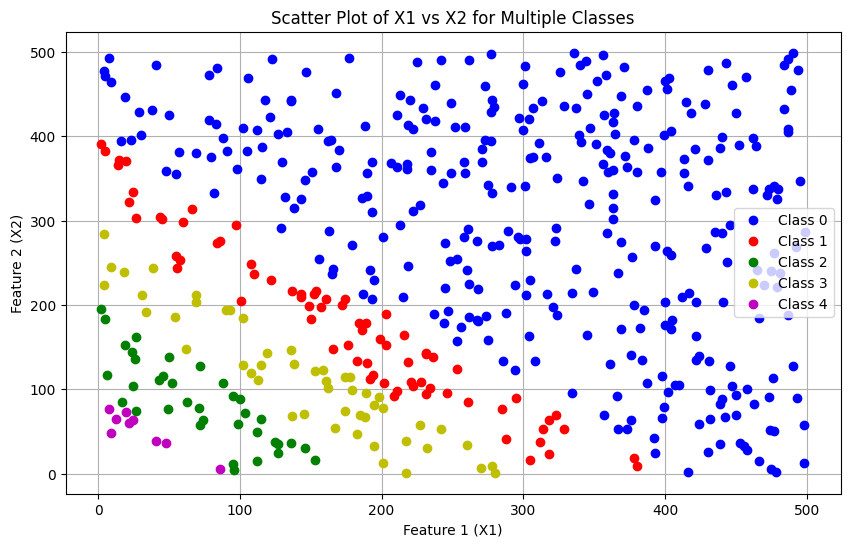

In [6]:
def plot_data(X1, X2, Y, classes):
    colors = ["bo", "ro", "go", "yo", "mo"]
    plt.figure(figsize=(10, 6))
    for i, cls in enumerate(classes):
        mask = Y == cls
        plt.plot(X1[mask], X2[mask], colors[i], label=f"Class {cls}")
    plt.xlabel("Feature 1 (X1)")
    plt.ylabel("Feature 2 (X2)")
    plt.title("Scatter Plot of X1 vs X2 for Multiple Classes")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_data(X1, X2, Y, classes)



# Train one vs rest classifier

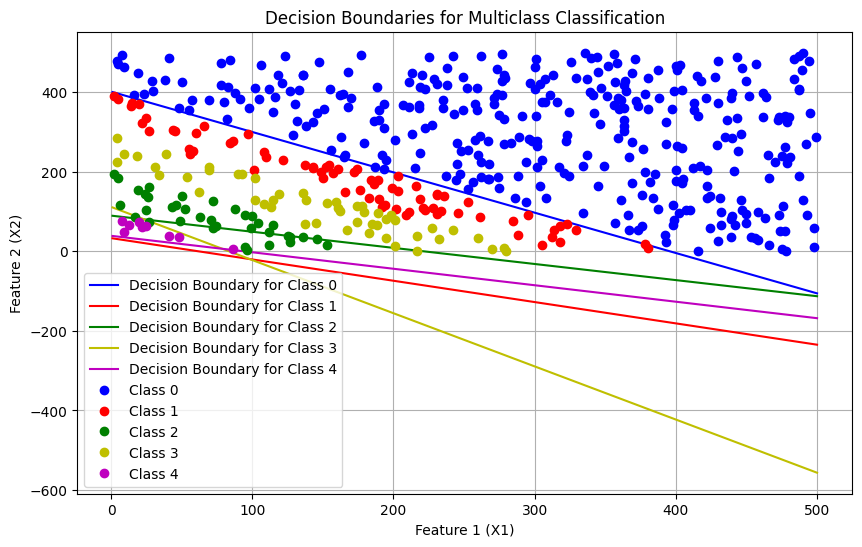

In [7]:
def train_ovr(X1, X2, Y, target_class, lr=0.1, theta=0.5, max_epochs=1000):
    W = [random.uniform(-1, 1), random.uniform(-1, 1)]
    b = random.uniform(-1, 1)
    losses = []
    epoch = 0

    binary_Y = (Y == target_class).astype(int)

    for _ in range(max_epochs):
        total_error = 0
        for i in range(len(Y)):
            ws = W[0] * X1[i] + W[1] * X2[i] + b
            pred = 1 if ws > theta else 0
            error = binary_Y[i] - pred
            total_error += abs(error)
            W[0] += lr * error * X1[i]
            W[1] += lr * error * X2[i]
            b += lr * error
        losses.append(total_error / len(Y))
        if total_error == 0:
            break
        epoch += 1
    return W, b, losses

# Train and visualize decision boundaries for each class
def plot_decision_boundaries(X1, X2, Y, classes, lr=0.01, theta=0.5):
    plt.figure(figsize=(10, 6))
    colors = ["b", "r", "g", "y", "m"]
    for i, cls in enumerate(classes):
        W, b, _ = train_ovr(X1, X2, Y, cls, lr, theta)
        x_vals = np.linspace(min(X1) - 1, max(X1) + 1, 100)
        y_vals = -(W[0] * x_vals + b) / W[1]
        plt.plot(x_vals, y_vals, colors[i] + "-", label=f"Decision Boundary for Class {cls}")

    for i, cls in enumerate(classes):
        mask = Y == cls
        plt.plot(X1[mask], X2[mask], colors[i] + "o", label=f"Class {cls}")

    plt.xlabel("Feature 1 (X1)")
    plt.ylabel("Feature 2 (X2)")
    plt.title("Decision Boundaries for Multiclass Classification")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_decision_boundaries(X1, X2, Y, classes)

Model Performance:

* The multi-class classification model was initially designed to separate data points based on five classes. Due to the limitations of binary decision boundaries, the model effectively classified data only after transforming the problem into binary classification.

* The loss decreased consistently over epochs, indicating convergence, but the binary classification approach restricted the ability to fully separate all five classes simultaneously.

Challenges Encountered:

* Infinite Loop Issue: The early implementation resulted in an infinite loop because of improper stopping conditions in the training process.

* Multiclass Complexity: Handling five classes with a binary classification approach revealed inherent limitations, as the model struggled to define decision boundaries for more than two classes.

* Decision Boundary Visualization: Plotting a single decision boundary for a multiclass dataset highlighted the challenge of interpreting class separability.

Lessons Learned:

* Importance of Proper Termination Conditions: Setting a maximum number of epochs and leveraging early stopping are crucial to preventing unbounded computations.

* Adaptability of Models: Binary classification logic is insufficient for handling multi-class tasks directly, underscoring the need for strategies like one-vs-rest or neural networks for multiclass classification.

* Visualization as a Diagnostic Tool: Visualizing decision boundaries and data points was instrumental in diagnosing the model's limitations and behavior.